<a href="https://colab.research.google.com/github/Sarach-git/Face-Recognition/blob/main/RPCA_FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Face Recognition | PCA vs Robust PCA

Machine Learning course - 2023.  
Departmant of Computer Science , Shahid Beheshti University

Superviosor : Dr.Katanforoush. 

Student : Sara Charmchi. 

ID: 400422066. 




# Abstract

Given a data matrix which is a superposition of
sparse and a low rank matrix; under some suitable assumptions
this article proposes a convex optimization program which exactly recovers the sparse and
low rank matrix. Among all feasible decomposition techniques of
a matrix this programs output is a simple addition of weighted
nuclear norm of sparse matrix and l1 norm of low rank matrix.
Even though a positive fraction of entries in the data matrix is
corrupted, this approach recovers the Principal components of
data matrix, thus this convincing property of Principal component
pursuit leads us to a principled approach to robust Principal
component analysis. Robust Principal Component Analysis (RPCA) is a modification of the widely used statistical procedure of principal component analysis (PCA) which works well with respect to grossly corrupted observations as a dimention reduction technique.


This approach also applies to a situation
when fraction of entries are missing as well. Application of the
discussed algorithm here, extends to face recognition where it
allows to remove speculations regarding shadowing effect and in
video surveillance where our method helps us in detecting objects
in cluttered background.The main focus of this notebook is the first application; face recognition.  

**This notebook contains two parts : pca & robust pca. First, pca algorithm is implemented on lfw-people dataset and to test its performance for face recognition, svm classification method is used. Then robust pca is introduced. The algorithms is tested on synthetic data as well as the original research paper dataset ( YaleB dataset ). At last both PCA and RPCA is tested on lfw-people dataset for different cases including original case and noisy case by adding gaussian, salt&pepper and speckle noise.Different hyperparametes are also tested on random sample.**

#Introduction

In today’s big data age, a lot of data is generated everywhere. 
e.g., tweets, video surveillance camera feeds, Netflix movie ratings’data, social network connectivity patterns across time, etc

How to deal with high-dimentional data?  

A lot of it is streaming big data that is not stored or not for too long and often needs to be analyzed on-the-fly.  
- First step before processing most big (high-dimensional) datasets is *dimension reduction* and *noise/outlier removal*. 
- Clean data usually has structure, e.g., sparsity or low-rank; in a long sequence, structure properties are dynamic (change with time)

In mathematical terms, this amounts to saying that if all the data points are stacked as column vectors of a matrix M, the matrix should (approximately) have low rank. Specifically, a common model is to assume that:  

$M = L_0 + N_0$ 

where $L_0$ is of low rank and *N0* is a small perturbation matrix (i.e. the noise).
two classical approach for dimension reduction:  
- PCA
- Linear transform to sparsify. 

In this notebook we will discuss pca and it's variant called rpca.







## Principal Component Analysis (PCA)


PCA (Principal Component Analysis) is a dimensionality reduction technique that was proposed by [Pearson in 1901](https://dl.acm.org/doi/10.1162/jocn.1991.3.1.71). It uses **Eigenvalues** and **EigenVectors** to reduce dimensionality and project a training sample/data on small feature space. Let’s look at the algorithm in more detail (in a face recognition perspective).

**Training Algorithm:**

Let’s Consider a set of m images of dimension $N*N$ (training images).  
We first convert these images into vectors of size $N^2$ such that:  
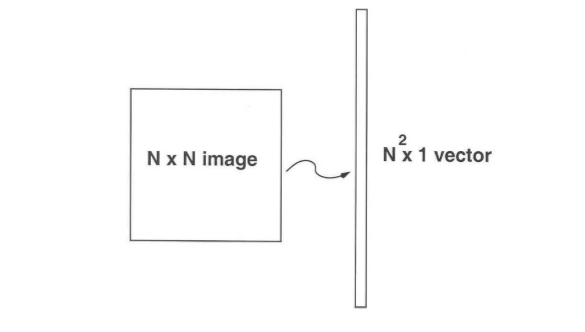

$x_1, x_2, ... , x_m$.  
Now we calculate the average of all these face vectors and subtract it from each vector:  
$ψ = {1 \over m} Σ_{i=1}^m x_i$ 

$ a_i = x_i - \psi $

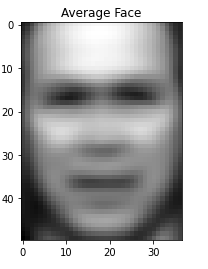

Now we take all face vectors so that we get a matrix of size of $N^2 * M$.  

$A = [a_1 , a_2 , ... , a_m]$

Now, we find Covariance matrix by multiplying $A$ with $A^T$. A has dimensions $N^2 * M$, thus $A^T$ has dimensions $M * N^2$. When we multiplied this gives us matrix of $N^2 * N^2$, which gives us $N^2$ eigenvectors of $N^2$ size which is not computationally efficient to calculate. So we calculate our covariance matrix by multiplying $A^T$ and $A$. This gives us $M * M$ matrix which has M (assuming $M << N^2$) eigenvectors of size M.
$ C_{ov} = A^T A $

In this step we calculate eigen values and eigenvectors of above covariance matrix using the formula below.  
$ A^T A V_I = \lambda_i v_i $.   

$AA^T A V_I = \lambda_i A v_i$.   
  
$C' u_i = λ_i u_i$


where $C' = A A^T and.  u_i = A v_i$

From the above statement It can be concluded that C' and C have same eigenvalues and their eigenvectors are related by the equation $u_i = A v_i$. Thus, the M eigenvalues (and eigenvectors) of covariance matrix gives the M largest eigenvalues(and eigenvectors) of C'.  

Now we calculate Eigenvector and Eigenvalues of this reduced covariance matrix and map them into the C' by using the formula $u_i = A v_i$.
Now we select the K eigenvectors of C' corresponding to the K largest eigenvalues (where K < M). These eigenvectors has size $N^2$.
In this step we used the eigenvectors that we got in previous step. We take the normalized training faces (face – average face)  $x_i$ and represent each face vectors in the linear of combination of the best K eigenvectors (as shown in the diagram below).  
$ x_i - ψ = Σ_{j=1}^K w_j u_j $

These  $u_j$ are called EigenFaces.

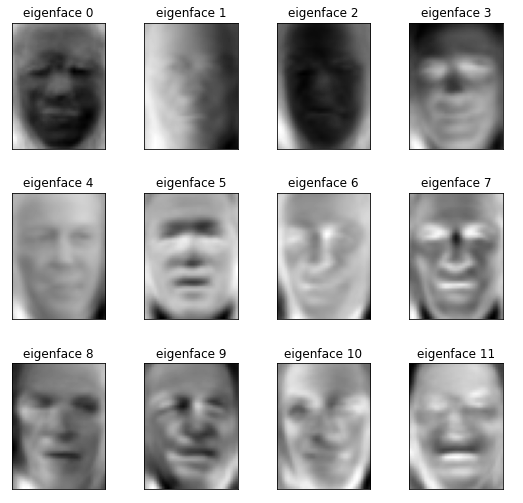

In this step, we take the coefficient of eigenfaces and represent the training faces in the form of a vector of those coefficients.

$x_i = \begin {bmatrix} w_1^i \\ w_2^i \\ w_3^i \\ . \\. \\. \\ w_k^i \end {bmatrix} $

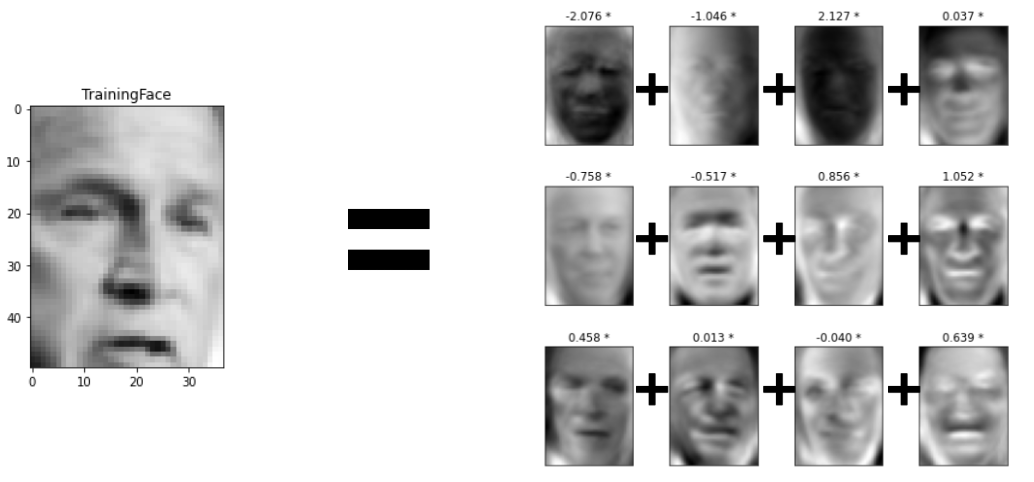

**Testing/Detection Algorithm :**

Given an unknown face y, we need to first preprocess the face to make it centered in the image and have the same dimensions as the training face
Now, we subtract the face from the average face $\psi$ .

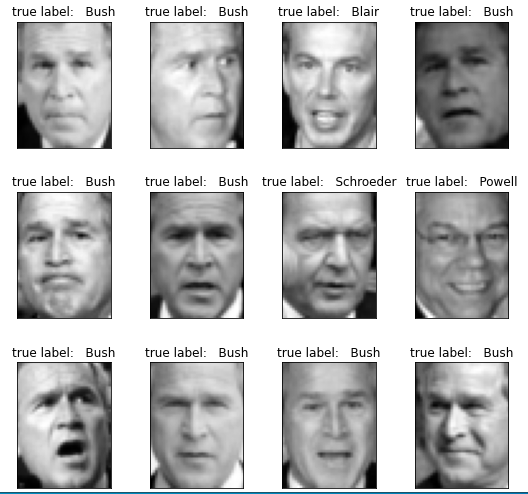

$Φ = y- ψ$

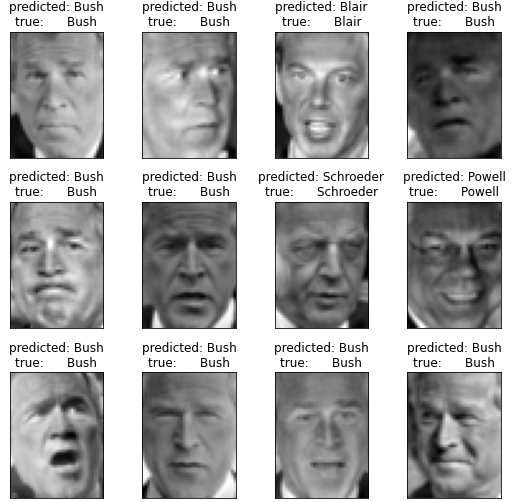

Now, we project the normalized vector into eigenspace to obtain the linear combination of eigenfaces: $Φ = Σ_{i=1}^k  w_i u_i$

From the above projection, we generate the vector of the coefficient such that

$Ω = \begin {bmatrix} w_1 \\ w_2 \\ w_3 \\ . \\. \\. \\ w_k \end {bmatrix} $

We take the vector generated in the above step and subtract it from the training image to get the minimum distance between the training vectors and testing vectors:  $e_r = min_{l} ||Ω- Ω_l||$

If this $e_r$ is below tolerance level $T_r$, then it is recognised with l face from training image else the face is not matched from any faces in training set.

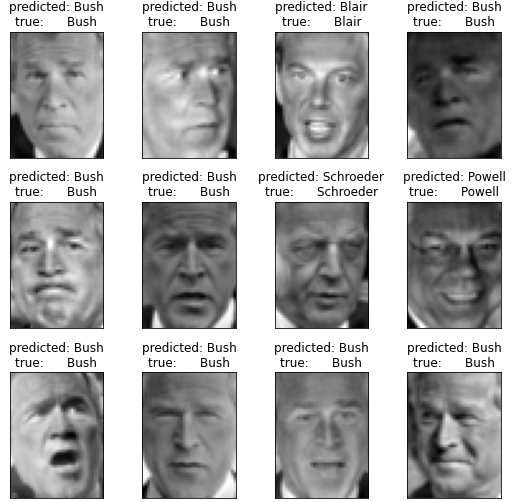

## Robust Principal Component Analysis (RPCA)

PCA is great because you can reduce a data matrix to a lower dimension without losing much. Although it is widely used, PCA doesn’t work well when there are noises in the input data. This is because the objective function $min ||D-A||$ doesn’t really incorporate the fact that the input might be noisy. As the name suggests, Robust PCA is a variant of PCA that is more robust against noises. It was efficiently solved by [Candès et al. in 2011](https://arxiv.org/pdf/0912.3599.pdf). 
 The goal of Robust PCA is $D = A + E $. This goal can be best illustrated with the image below:

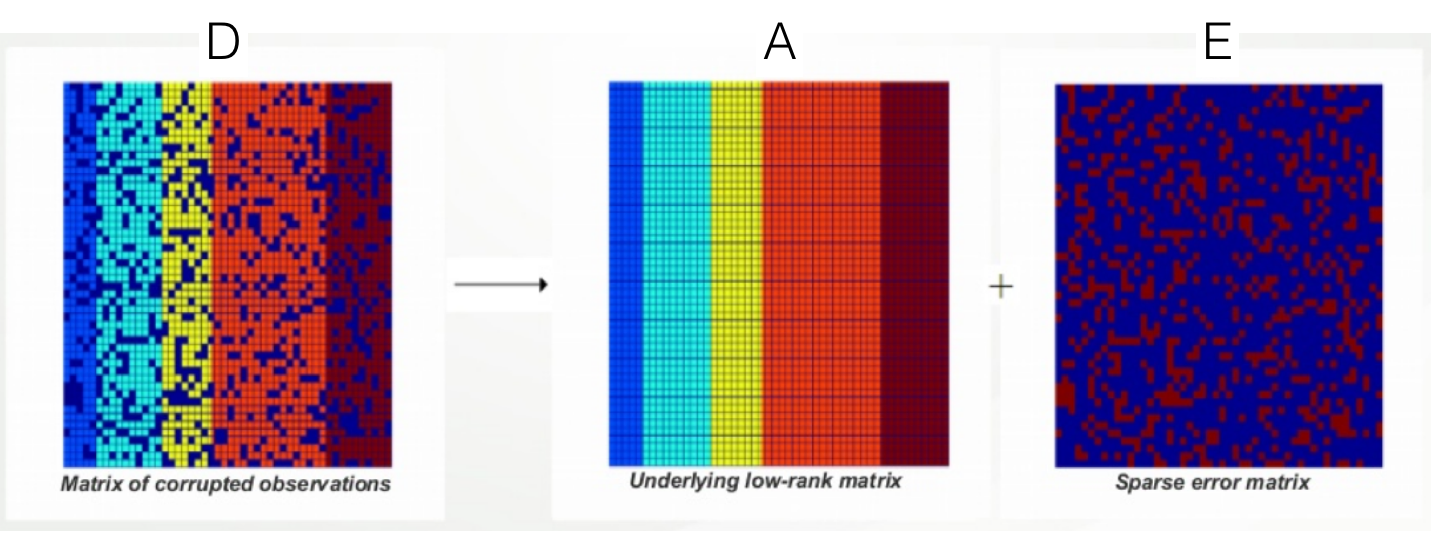

The intuition is that noisy images should be able to be decomposed into 
A
 (underlying less noisy image) and 
E
 (noise). Just like PCA, we would like 
A
 to be of lower rank. Furthermore, since 
E
 is a noise, we want it to be sparse.  

 **Objective Function: PCP** : How can we formulate this intuition in terms of an objective function? First thought would be to try this:  


$min_{A,E} rank (A) + \lambda ||E|| _0$. 

$s.t.D = A + E$


The first terms ensures 
A
 is low rank and the second term ensures 
E
 is sparse. Note that 
|
|
E
|
|
0
 is the 
l
0
 norm, the number of non-zero elements in 
E
. If you’ve learned optimization before, you will know that this is not a good objective function. This is because the objective is neither continuous nor convex.

The key insight Candès provided in his paper is that we can proxy this with what he named Principal Component Pursuit (PCP):  
$min_{A,E} ||A||_* + \lambda ||E|| _1$. 

$s.t.D = A + E$

 
Lower rank is now enforced by the nuclear norm, which is essentially the sum of singular values of 
A
. Sparsity is enforced by the $l_1$
 norm.

Candès showed that this proxy optimization function has the following property:

if 
A
 is sufficiently low rank but not sparse AND 
E
 is sufficiently sparse but not low rank, then 
D
 can be recovered exactly with.  
$\lambda = {1 \over \sqrt{max(m,n}}$
(Theorem 1.1)

This is amazing, because decomposing 
D
 into 
A
 and 
E
 in an unsupervised fashion seems very very hard. The theorem states that this is possible. Section 2 and 3 of his paper proves this theorem. Section 4 empirically shows that PCP can reconstruct. following picture is the experimental result from the original paper:

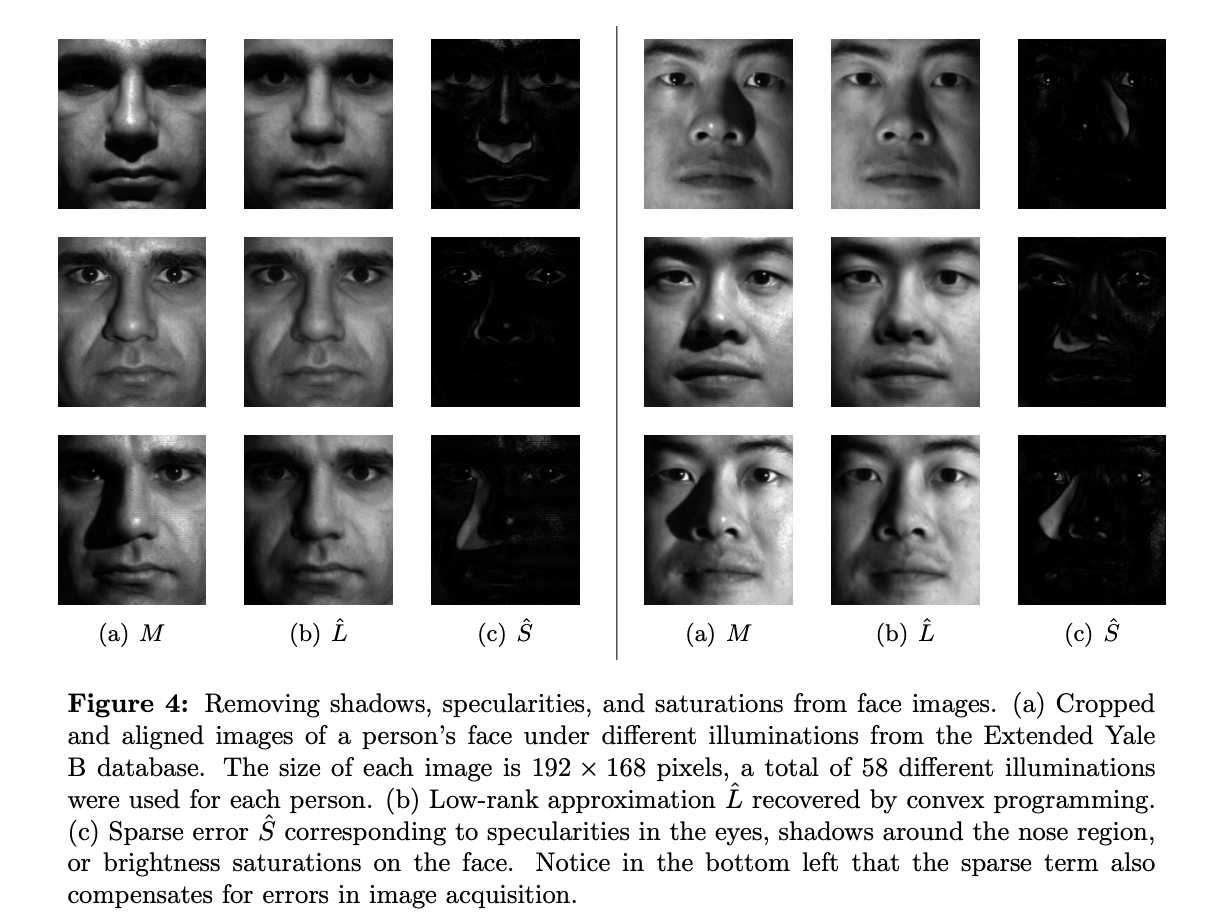

PCP is convex, so we can solve it for example using interior point methods. However, the author claims that this is not fast enough (with $ O(N^6)$
 run time). In section 5, he introduces augmented Lagrange multiplier (ALM), which I found is interesting.

**ALM** : Before discussing how we can solve PCP, let’s briefly learn what ALM does. Say we have the following optimization problem:
$min_{x} f(x)$.   

$s.t.c_{j} (x) = 0 , j ∈ [m]$

There are two ways to solve this:

1. Langrange multiplier
We can reformualte the above problem using a Langrange multipler 
$λ_j$
 and solve instead:
$min_x f(x) + \mu \Sigma_{j=1}^{m} c_j (x)$

2. Penalty method
A less known approach is called the penalty method. The basic idea is that we can solve the above objective function by solving repeatedly. 
$min_x f(x) + \mu \Sigma_{j=1}^{m} c_j ^2 (x)$


Here, we are using a quadratic loss function 
c
2
j
(
x
)
, but it can be linear, cubed, anything.   
The **Algorithm** is as follows:


1. Solve this optimization problem.
2. Increment: $\mu = \rho \mu $ ($\rho =10$ is commonly used).
3. Solve the next optimization problem starting from $x^*$ from the previous step.
4. Repeat until convergence.

**ALM = Langrange + Penalty Method**

ALM basically combines these two by iteratively solving the following, updating 
μ
 each iteration until convergence:

$min_x f(x) + \mu \Sigma_{j=1}^{m} c_j (x) + {\mu\over2} \Sigma_{j=1}^{m} c_j ^2 (x) $

**PCP as ALM** 

Now, we can formulate PCP in ALM form using matrix notations:



$min_{A,E} ||A||_* + \lambda ||E||_1 + < T,D - A - E > + {\mu \over 2} ||D-A-E ||_{F} ^ 2 $

where F is the Frobenius norm (square root of the sum of squares of matrix elements) and 
Y
 is the lagrange multipliers.

In practice, we need to alternately optimize 
A
,
E
. Closed form update formula for these are quite straightforward to derive.

#Data

[Labeled Faces in the Wild (LFW) ](https://www.kaggle.com/datasets/atulanandjha/lfwpeople) is an image dataset containing face photographs, collected especially for studying the problem of unconstrained face recognition. It includes over 13,000 images of faces collected from across the web.  
Each picture is centered on a single face. The typical task is called Face Verification: given a pair of two pictures, a binary classifier must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is: given the picture of the face of an unknown person, identify the name of the person by referring to a gallery of previously seen pictures of identified persons.  




| Database | Size | Description | Format & Color | Original/Reduced  Image Size
| --- | ----------- |------- | --------| -------- |
| LFW People | 13000 imags |1680 famous faces | JPEG-RGB | 250 * 250 / 62 * 74 pixels |





Dataset is as follows:  

**dataset** : dict-like object with the following attributes:

**dataset.data**: numpy array of shape (13233, 2914)

Each row corresponds to a ravelled face image of original size 62 x 47 pixels. Changing the slice_ or resize parameters will change the shape of the output.

**dataset.images** : numpy array of shape (13233, 62, 47)

Each row is a face image corresponding to one of the 5749 people in the dataset. Changing the slice_ or resize parameters will change the shape of the output.

**dataset.target** : numpy array of shape (13233,)

Labels associated to each face image. Those labels range from 0-5748 and correspond to the person IDs.

**dataset.DESCR** : string

Description of the Labeled Faces in the Wild (LFW) dataset.

#Implementation

This notebook contains two parts : pca & robust pca. First, pca algorithm is implemented on lfw-people dataset and to test its performance for face recognition, svm classification method is used. Then robust pca is introduced.
The algorithms is tested on synthetic data as well as the original research paper dataset ( YaleB dataset ). At last both PCA and RPCA is tested on lfw-people dataset for different cases including original case and noisy case by adding gaussian, salt&pepper and speckle noise.Different hyperparametes are also tested on random sample.

###Loading dataset

In [ ]:
import json, sys, random
import numpy as np

%matplotlib inline
from PIL import Image, ImageDraw 
from matplotlib import pyplot as plt

from time import time
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import os
# libraries to support custom function for copying.

import errno
import shutil





In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('yalefaces.zip', 'r')
zip_ref.extractall('yalefaces')
zip_ref.close()

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saracharmchics","key":"e9ba061aaeea22d3ad9384c86eba893a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
     

In [ ]:
!kaggle datasets download -d atulanandjha/lfwpeople

 97% 225M/232M [00:02<00:00, 115MB/s] 
100% 232M/232M [00:02<00:00, 95.5MB/s]


In [ ]:
!ls

kaggle.json  lfwpeople.zip  sample_data  yalefaces  yalefaces.zip


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('lfwpeople.zip', 'r')
zip_ref.extractall('unzip_lfwpeople')
zip_ref.close()

In [ ]:
def copy(src, dest):
    try:
        shutil.copytree(src, dest)
    except OSError as e:
        # If the error was caused because the source wasn't a directory
        if e.errno == errno.ENOTDIR:
            shutil.copy(src, dest)
        else:
            print('Directory not copied. Error: %s' % e)

In [ ]:
src = '/content/unzip_lfwpeople'
dest = '/content/unzip_lfwpeople/lfw_home'
copy(src,dest)

In [ ]:
# verifying the contents of src and dest folder

print(os.listdir('/content/unzip_lfwpeople'))
print(os.listdir('/content/unzip_lfwpeople/lfw_home'))
# path = '../LFW/lfw_home/'
path = '/content/unzip_lfwpeople'

['lfw-funneled.tgz', 'pairsDevTrain.txt', 'pairsDevTest.txt', 'pairs.txt', 'lfw_home']
['lfw-funneled.tgz', 'pairsDevTrain.txt', 'pairsDevTest.txt', 'pairs.txt']


In [ ]:
# Load data
lfw_dataset = sklearn.datasets.fetch_lfw_people(data_home = path, min_faces_per_person=100,  download_if_missing = False)

In [ ]:
n_samples, h, w = lfw_dataset.images.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_dataset.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_dataset.target
target_names = lfw_dataset.target_names
n_classes = target_names.shape[0]

In [ ]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1140
n_features: 2914
n_classes: 5


In [ ]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

##PCA

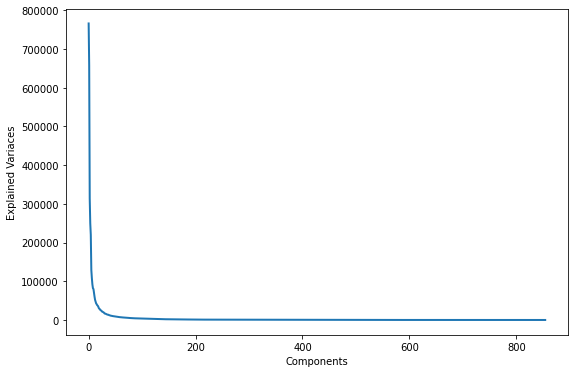

In [ ]:
# Finding Optimum Number of Principle Component, this is helpful to set the right parameters 
pca = PCA()
pca.fit(X_train)
plt.figure(1, figsize=(9,6))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [ ]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction

n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 855 faces
done in 0.461s


In [ ]:
eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Projecting the input data on the eigenfaces orthonormal basis
done in 0.025s


In [ ]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 14.955s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [ ]:
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.031s
                   precision    recall  f1-score   support

     Colin Powell       0.92      0.94      0.93        64
  Donald Rumsfeld       0.96      0.84      0.90        32
    George W Bush       0.88      0.96      0.92       127
Gerhard Schroeder       0.93      0.86      0.89        29
       Tony Blair       0.96      0.79      0.87        33

         accuracy                           0.91       285
        macro avg       0.93      0.88      0.90       285
     weighted avg       0.92      0.91      0.91       285

[[ 60   0   4   0   0]
 [  0  27   3   1   1]
 [  5   0 122   0   0]
 [  0   0   4  25   0]
 [  0   1   5   1  26]]


In [ ]:
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

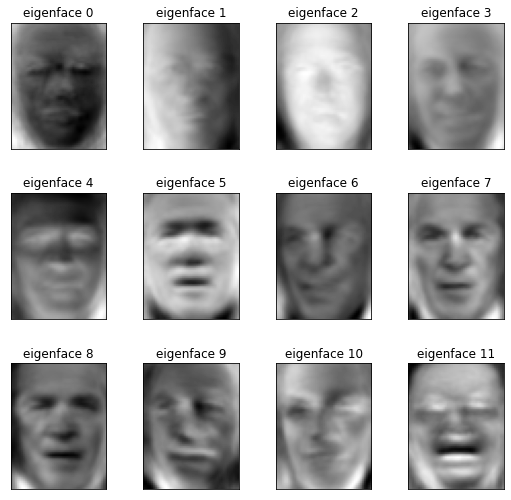

In [ ]:
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

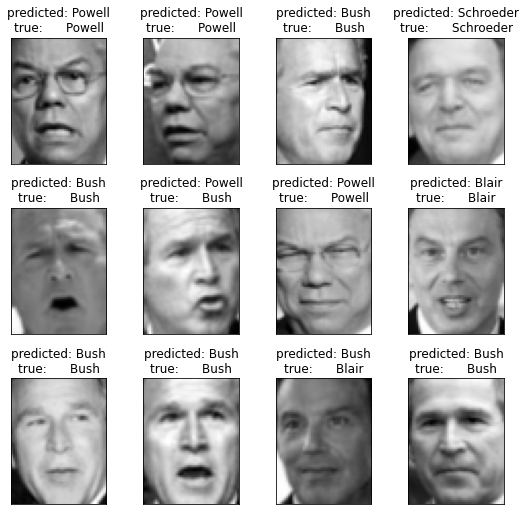

In [ ]:
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

## RPCA

In [ ]:
import os
import gc
import psutil
import glob
import random
import tarfile
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from PIL import Image

%matplotlib inline
%load_ext autoreload
%autoreload 2


import numpy as np
import pandas as pd
from imageio import imread
import matplotlib.pylab as plt


import os 
from os.path import join as pjoin
import glob
import numpy as np
from scipy import linalg as LA
import cv2
from PIL import Image
import time
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (18,18)
mpl.rcParams['image.cmap'] = 'inferno'




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
'''Helper functions
'''

def plot_LS(data,L,S, clim=None, cmap = 'nipy_spectral'):
    '''function for ploting decomposition results
    '''
    fig, ax = plt.subplots(1,4, figsize=(16,4))
    ax0 = ax[0].imshow(data, cmap=plt.get_cmap(cmap))
    ax[0].set_title("Original data M", fontsize = 16)
    if clim:
        ax0.set_clim(clim[0], clim[1])   
    ax1 = ax[1].imshow(L, cmap=plt.get_cmap(cmap))
    ax[1].set_title("Low rank matrix L", fontsize = 16)
    if clim:
        ax1.set_clim(clim[0], clim[1])  
    ax2 = ax[2].imshow(S, cmap=plt.get_cmap(cmap))
    ax[2].set_title("Sparse noise S", fontsize = 16)
    if clim:
        ax2.set_clim(clim[0], clim[1]) 
    ax3 = ax[3].imshow(data-L-S, cmap=plt.get_cmap(cmap))
    ax[3].set_title("Residuals: M-L-S", fontsize = 16)
    if clim:
        ax3.set_clim(clim[0], clim[1])
        
def image_LS(image, L_image, S_image, thres=0):
    '''function for ploting decomposition results, image example
    '''
    fig, ax = plt.subplots(1,4,figsize=(16,6))
    ax[0].imshow(image.astype('uint8'))
    ax[0].set_title("Original image", fontsize = 16)
    ax[1].imshow(L_image.astype('uint8'))
    ax[1].set_title("Low rank matrix L", fontsize = 16)
    ax[2].imshow(np.abs(S_image).astype('uint8'))
    ax[2].set_title("Sparse matrix S", fontsize = 16);
    tmp = image*0.0
    tmp[(np.abs(S_image)>thres)] = image[(np.abs(S_image)>thres)]*1
    ax[3].imshow(tmp.astype('uint8'))
    ax[3].set_title("Filter image pixels with S!=0", fontsize = 16);      

In [ ]:
!pip install fbpca

In [ ]:
import numpy as np
try:
    from fbpca import pca
except ModuleNotFoundError:
    print('\n install fbpca first: `pip install fbpca` \n')

class RobustPCA:
    """Robust principal component analysis (Robust PCA)

    Dimensionality reduction using alternating directions methods
    to decompose the input 2D matrix M into a lower rank dense 2D matrix L and sparse
    but not low-rank 2D matrix S.

    Parametersfbpca.pca
    ----------
    lamb : positive float
        Sparse component coefficient.
        if user doesn't set it:
            lamb = 1/sqrt(max(M.shape))
        A effective default value from the reference.

    mu : positive float
        Coefficient for augmented lagrange multiplier
        if user doesn't set it:
            n1, n2 = M.shape
            mu = n1*n2/4/norm1(M) # norm1(M) is M's l1-norm
        A effective default value from the reference.

    max_rank : positive int
        The maximum rank allowed in the low rank matrix
        default is None --> no limit to the rank of the low
        rank matrix.

    tol : positive float
        Convergence tolerance

    max_iter : positive int
        Maximum iterations for alternating updates

    use_fbpca : bool
        Determine if use fbpca for SVD. fbpca use Fast Randomized SVDself.
        default is False

    fbpca_rank_ratio : float, between (0, 1]
        If max_rank is not given, this sets the rank for fbpca.pca()
        fbpca_rank = int(fbpca_rank_ratio * min(M.shape))

    Attributes:
    -----------
    L : 2D array
            Lower rank dense 2D matrix

    S : 2D array
        Sparse but not low-rank 2D matrix

    converged : bool
        Flag shows if the fit is converged or not


    Reference:
    ----------
    `Emmanuel J. Candes, Xiaodong Li, Yi Ma, and John Wright`
    "Robust Principal Component Analysis?"
    https://statweb.stanford.edu/~candes/papers/RobustPCA.pdf

    """

    def __init__(self, lamb=None, mu=None, max_rank=None, tol=1e-6, max_iter=100, use_fbpca=False, fbpca_rank_ratio=0.2):
        self.lamb = lamb
        self.mu = mu
        self.max_rank = max_rank
        self.tol = tol
        self.max_iter = max_iter
        self.use_fbpca = use_fbpca
        self.fbpca_rank_ratio = fbpca_rank_ratio
        self.converged = None
        self.error = []

    def s_tau(self, X, tau):
        """Shrinkage operator
            Sτ [x] = sign(x) max(|x| − τ, 0)

        Parameters
        ----------
        X : 2D array
            Data for shrinking

        tau : positive float
            shrinkage threshold

        Returns
        -------
        shirnked 2D array
        """

        return np.sign(X)*np.maximum(np.abs(X)-tau,0)


    def d_tau(self, X):
        """Singular value thresholding operator
            Dτ (X) = USτ(Σ)V∗, where X = UΣV∗

        Parameters
        ----------
        X : 2D array
            Data for shrinking

        Returns
        -------
        thresholded 2D array
        """

        # singular value decomposition
        if self.use_fbpca:
            if self.max_rank:
                (u, s, vh) = pca(X, self.max_rank, True, n_iter = 5)
            else:
                (u, s, vh) = pca(X, int(np.min(X.shape)*self.fbpca_rank_ratio), True, n_iter = 5)
        else:
            u, s, vh = np.linalg.svd(X, full_matrices=False)

        # Shrinkage of singular values
        tau = 1.0/self.mu
        s = s[s>tau] - tau
        rank = len(s)

        if self.max_rank:
            if rank > self.max_rank:
                s = s[0:self.max_rank]
                rank = self.max_rank*1

        # reconstruct thresholded 2D array
        return  np.dot(u[:, 0:rank] * s, vh[0:rank,:]), rank



    def fit(self, M):
        """Robust PCA fit

        Parameters
        ----------
        M : 2D array
            2D array for docomposing

        Returns
        -------
        L : 2D array
            Lower rank dense 2D matrix

        S : 2D array
            Sparse but not low-rank 2D matrix
        """

        size = M.shape

        # initialize S and Y (Lagrange multiplier)
        S = np.zeros(size)
        Y = np.zeros(size)

        # if lamb and mu are not set, set with default values
        if self.mu==None:
            self.mu = np.prod(size)/4.0/np.sum(np.abs(M))
        if self.lamb==None:
            self.lamb = 1/np.sqrt(np.max(size))

        # Alternating update
        for i in range(self.max_iter):
            L, rank = self.d_tau(M-S+1.0/self.mu*Y)
            S = self.s_tau(M-L+1.0/self.mu*Y, self.lamb/self.mu)

            # Calculate residuals
            residuals = M-L-S
            residuals_sum = np.sum(np.abs(residuals))
            self.error.append(residuals_sum)

            # Check convergency
            if residuals_sum <= self.tol:
                break

            Y = Y + self.mu*residuals

        # Check if the fit is converged
        if residuals_sum > self.tol:
            print('Not converged!')
            print('Total error: %f, allowed tolerance: %f'%(residuals_sum, self.tol))
            self.converged = False
        else:
            print('Converged!')
            self.converged = True

        self.L, self.S, self.rank = L, S, rank

    def get_low_rank(self):
        '''Return the low rank matrix

        Returns:
        --------
        L : 2D array
            Lower rank dense 2D matrix
        '''
        return self.L

    def get_sparse(self):
        '''Return the sparse matrix

        Returns:
        --------
        S : 2D array
            Sparse but not low-rank 2D matrix
        '''
        return self.S

    def get_rank(self):
        '''Return the rank of low rank matrix

        Returns:
        rank : int
            The rank of low rank matrix
        '''
        return self.rank

###RPCA | Implement on synthetic data

First check rpca on demo data to check the functionality, then implement on the dataset :

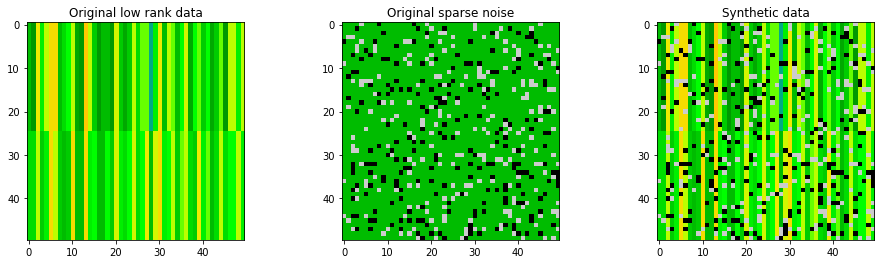

In [ ]:
'''generate demo data
'''
np.random.seed(123)

# Low rank data
data_demo_lowrank = np.ones((50,50))*np.random.randint(10, size=(50))
data_demo_lowrank[0:25,:] = data_demo_lowrank[0:25,:]+ \
                            np.ones((25,50))*np.random.randint(low=-4,high=4, size=(50))

# Sparse (noise) data   
data_demo_sparse = - 100*np.random.binomial(1,0.1, size=2500).reshape([50,50])\
                   + 100*np.random.binomial(1,0.1, size=2500).reshape([50,50])
    
# Synthetic data M
data_demo = data_demo_lowrank + data_demo_sparse

# plot matrices
fig, ax = plt.subplots(1,3, figsize=(16,4))
ax1 = ax[0].imshow(data_demo_lowrank, cmap=plt.get_cmap('nipy_spectral'))
ax2 = ax[1].imshow(data_demo_sparse, cmap=plt.get_cmap('nipy_spectral'))
ax3 = ax[2].imshow(data_demo, cmap=plt.get_cmap('nipy_spectral'))
ax1.set_clim([-20,20])
ax2.set_clim([-20,20])
ax3.set_clim([-20,20])
ax[0].set_title('Original low rank data');
ax[1].set_title('Original sparse noise');
ax[2].set_title('Synthetic data');

In [ ]:
# Robust PCA
rpca_demo = RobustPCA(tol = 0.000001)
rpca_demo.fit(data_demo)

# extract decomposed matrices
L_demo = rpca_demo.get_low_rank()
S_demo = rpca_demo.get_sparse()

Not converged!
Total error: 0.000002, allowed tolerance: 0.000001


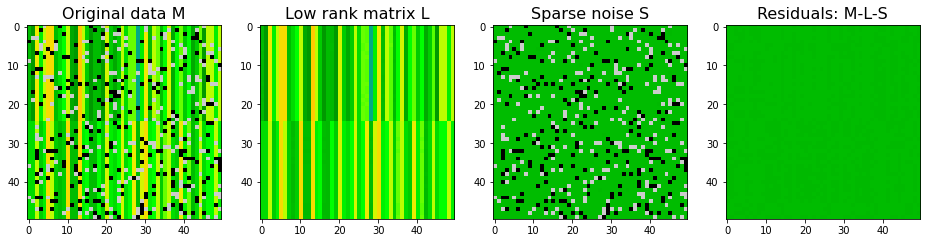

In [ ]:
# plot decomposition for demo data
plot_LS(data_demo, L_demo, S_demo, clim=(-20,20))

We can also add some Gaussian noise (dense noise 
) to the synthetic data and see how the algorithm works.

In [ ]:
# Adding Gaussian noise        
data_demo_G = data_demo + np.random.normal(size=(50,50))

Converged!
------------------------
Sum squared errors for low rank matrix: 1036.6182858509737
Sum squared errors for Sparse matrix: 1348.7311742049728
------------------------


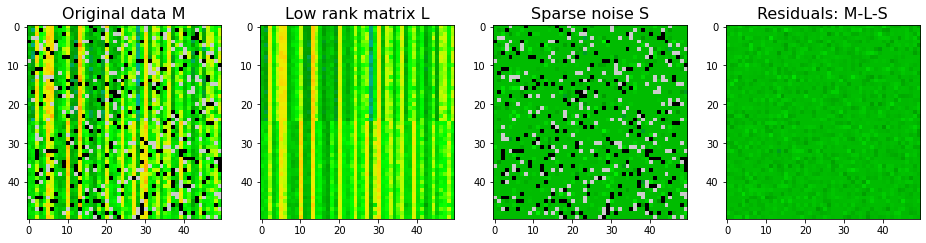

In [ ]:
# Robust PCA
rpca_demo = RobustPCA(tol = 1000)
rpca_demo.fit(data_demo_G)
# extract decomposed matrices
L_demo = rpca_demo.get_low_rank()
S_demo = rpca_demo.get_sparse()
# plot decomposition for demo data
plot_LS(data_demo_G, L_demo, S_demo, clim=(-20,20))

print("------------------------")
print("Sum squared errors for low rank matrix:", np.sum((L_demo - data_demo_lowrank)**2))
print("Sum squared errors for Sparse matrix:", np.sum((S_demo - data_demo_sparse)**2))
print("------------------------")

### RPCA | implement pca & rpca on the dataset that was first used by the original paper; face recognitions

dataset can be found [here](https://www.kaggle.com/datasets/olgabelitskaya/yale-face-database)

In [ ]:
from __future__ import division, print_function

import numpy as np

try:
    from pylab import plt
except ImportError:
    print('Unable to import pylab. R_pca.plot_fit() will not work.')

try:
    # Python 2: 'xrange' is the iterative version
    range = xrange
except NameError:
    # Python 3: 'range' is iterative - no need for 'xrange'
    pass


class R_pca:

    def __init__(self, D, mu=None, lmbda=None):
        self.D = D
        self.S = np.zeros(self.D.shape)
        self.Y = np.zeros(self.D.shape)

        if mu:
            self.mu = mu
        else:
            self.mu = np.prod(self.D.shape) / (4 * self.norm_p(self.D, 2))

        self.mu_inv = 1 / self.mu

        if lmbda:
            self.lmbda = lmbda
        else:
            self.lmbda = 1 / np.sqrt(np.max(self.D.shape))

    @staticmethod
    def norm_p(M, p):
        return np.sum(np.power(M, p))

    @staticmethod
    def shrink(M, tau):
        return np.sign(M) * np.maximum((np.abs(M) - tau), np.zeros(M.shape))

    def svd_threshold(self, M, tau):
        U, S, V = np.linalg.svd(M, full_matrices=False)
        return np.dot(U, np.dot(np.diag(self.shrink(S, tau)), V))

    def fit(self, tol=None, max_iter=1000, iter_print=100):
        iter = 0
        err = np.Inf
        Sk = self.S
        Yk = self.Y
        Lk = np.zeros(self.D.shape)

        if tol:
            _tol = tol
        else:
            _tol = 1E-7 * self.norm_p(np.abs(self.D), 2)

        while (err > _tol) and iter < max_iter:
            Lk = self.svd_threshold(
                self.D - Sk + self.mu_inv * Yk, self.mu_inv)
            Sk = self.shrink(
                self.D - Lk + (self.mu_inv * Yk), self.mu_inv * self.lmbda)
            Yk = Yk + self.mu * (self.D - Lk - Sk)
            err = self.norm_p(np.abs(self.D - Lk - Sk), 2)
            iter += 1
#             if (iter % iter_print) == 0 or iter == 1 or iter > max_iter or err <= _tol:
#                 print('iteration: {0}, error: {1}'.format(iter, err))

        self.L = Lk
        self.S = Sk
        return Lk, Sk

    def plot_fit(self, size=None, tol=0.1, axis_on=True):

        n, d = self.D.shape

        if size:
            nrows, ncols = size
        else:
            sq = np.ceil(np.sqrt(n))
            nrows = int(sq)
            ncols = int(sq)

        ymin = np.nanmin(self.D)
        ymax = np.nanmax(self.D)
        print('ymin: {0}, ymax: {1}'.format(ymin, ymax))

        numplots = np.min([n, nrows * ncols])
        plt.figure()

        for n in range(numplots):
            plt.subplot(nrows, ncols, n + 1)
            plt.ylim((ymin - tol, ymax + tol))
            plt.plot(self.L[n, :] + self.S[n, :], 'r')
            plt.plot(self.L[n, :], 'b')
            if not axis_on:
                plt.axis('off')

In [ ]:
import os 
from os.path import join as pjoin
import glob
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib as mpl
import time
mpl.rcParams['figure.figsize'] = (15,10)
mpl.rcParams['image.cmap'] = 'inferno'

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def imread(imgpath):
    return cv2.cvtColor(cv2.imread(imgpath), cv2.COLOR_BGR2RGB)

def imshow(img, cmap=None):
    plt.title(img.shape)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
#     plt.show()

def resize(img, imgshape):
    return cv2.resize(img, (imgshape[1], imgshape[0]))

def stack_images(matrices, k=5, imgshape=None, captions=None, leftcaption=None):
    """
        matrices -- (N, *imgshape, k) array,
                    where N is the number of `matrices`,
                          k is the number of images in each `matrix`
    """
    assert imgshape is not None, 'Please specify the spatial size of the frames (imgshape)'
    k = min(matrices[0].shape[-1], k)
    N = len(matrices)
    num_cols, num_rows = N, 1
    if captions is None:
        captions = ['']*N
    matrices_ = []
    if len(imgshape) == 2:
        for m in matrices:
            M = m.reshape((*imgshape,-1)).transpose(2,0,1)[:k]
            matrices_.append(M)
    else:
        for m in matrices:
            M = m.reshape((*imgshape,-1)).transpose(3,0,1,2)[:k]
            matrices_.append(M)
    for k_ in range(k):
        for i in range(N):
            plt.subplot(num_rows, num_cols, i+1)
            imshow(matrices_[i][k_], 'gray')
            plt.title(captions[i])
            if i == 0:
                plt.title(leftcaption, loc='left')
        plt.show()
        
def get_data_matrix(dataset_path, imgshape, m=None, m_start=0, m_freq=1, color=False, ext='jpg'):
    """
    imgshape -- np.array([h, w]) -- spatial size of the frames
    m -- number of frames,
         if None then all the images in dataset_path will be used
    m_start -- number of the frame from which data matrix starts
    m_freq -- frequency of frames to collect in data matrix
    """
    imgpaths = sorted(glob.glob(pjoin(dataset_path, '*.{}'.format(ext))))
    m = len(imgpaths) // m_freq if m is None else min(m, len(imgpaths) // m_freq)
    if color:
        imgshape = np.array([*imgshape, 3])
        X = resize(imread(imgpaths[m_start]), imgshape).reshape((-1,1))
        for imgpath in imgpaths[m_start + m_freq : m_start + m*m_freq : m_freq]:
            img = resize(imread(imgpath), imgshape)
            img_vec = img.reshape((-1,1))
            X = np.hstack((X, img_vec))
    else:
        X = resize(gray(imread(imgpaths[m_start])), imgshape).reshape((-1,1))
        for imgpath in imgpaths[m_start + m_freq : m_start + m*m_freq : m_freq]:
            img = resize(gray(imread(imgpath)), imgshape)
            img_vec = img.reshape((-1,1))
            X = np.hstack((X, img_vec))
    return X

def getMeanTime(f, params, iters=100):
    dts = []
    for it in range(iters):
        start_time = time.time()
        f(*params)
        dt = time.time() - start_time
        dts.append(dt)
    return np.mean(dts)

#####################################   Background Modeling with SVD, RPCA #####################################
from scipy import linalg as LA
import sys

sys.path.append('../rpca')


def bmSVD(X, k, color=False):
    """
    k -- rank of the low-rank matrix approximation
    """
    U, S, VT = LA.svd(X, full_matrices=False)
    Sigma = np.eye(k)*S[:k]
    A = U[:,:k].dot(Sigma).dot(VT[:k,:])

    if color:
        # A = np.round(np.minimum(np.maximum(A, 0), 255)).astype(np.uint8)
        # A = np.minimum(np.maximum(A, 0), 255).astype(np.uint8)
        # E = np.maximum(X-A,0)
        # A = A.astype(np.uint8)
        A = np.round(np.minimum(np.maximum(A, 0), 255)).astype(np.uint8)
    E = X - A
    return A, E

def bmRPCA(X, mu=None, lmbda=None, color=False, out=False):
    rpca = R_pca(X, mu=mu, lmbda=lmbda)
    A, E = rpca.fit()
    if out:
        print('Rank of A = {}'.format(np.linalg.matrix_rank(A)))
    if color:
        A = A.astype(np.uint8)
        E = np.maximum(E, 0).astype(np.uint8)
    return A, E



def bmCompare(dataset_path, imgshape, m=None, m_start=0, m_freq=1, color=False, ext='jpg', leftcaption='', 
              show_inline=True,
              k=1, mu=0.0001, lmbda=0.01,
              reg=1, tol=1e-06, iters=500):
    X = get_data_matrix(dataset_path, imgshape, m, m_start, m_freq, color, ext)
    SVD, RPCA, ROSL = {}, {}, {}
    SVD['A'], SVD['E'] = bmSVD(X, k)
    RPCA['A'], RPCA['E'] = bmRPCA(X, mu, lmbda)
    
    
    if show_inline:
        captions = ['Raw', 'BG (SVD)', 'BG (RPCA)',, 'FG (SVD)', 'FG (RPCA)']
        M = (X, SVD['A'], RPCA['A'], SVD['E'], RPCA['E'])
        stack_images(M, k=1, imgshape=imgshape, captions=captions, leftcaption=leftcaption)
    else:
        captions = ['Raw Frame', 'BG (SVD)', ' BG (RPCA)']
        M = (X, SVD['A'], RPCA['A'])
        stack_images(M, k=1, imgshape=imgshape, captions=captions, leftcaption=leftcaption)

        captions = ['Raw Frame', 'FG (SVD)', ' FG (RPCA)']
        M = (X, SVD['E'], RPCA['E'])
        stack_images(M, k=1, imgshape=imgshape, captions=captions, leftcaption=leftcaption)
    
    
def bmCompareTime(dataset_path, imgshape, m=None, m_start=0, m_freq=1, color=False, ext='jpg', n_it=10,
#             k=1, mu=None, lmbda=None,
            k=1, mu=0.0001, lmbda=0.01,
            reg=1, tol=1e-06, iters=500):
    X = get_data_matrix(dataset_path, imgshape, m, m_start, m_freq, color, ext)
    tSVD = getMeanTime(bmSVD, (X, k), n_it)
    tRPCA = getMeanTime(bmRPCA, (X, mu, lmbda), n_it)
    
    return tSVD, tRPCA


################################   Fitting data by affine subspace with SVD, RPCA, ROSL   ################################

def sample_mvn2D(mu1=0, mu2=0, sigma1=1, sigma2=1, rho=0, N=100):
    x0 = np.random.normal(size=N)
    y0 = np.random.normal(size=N)
    x = mu1 + sigma1*x0
    y = mu2 + sigma2*(rho*x0 + np.sqrt(1-rho**2)*y0)
    A = np.hstack((x.reshape(-1,1), y.reshape(-1,1)))
    return A

def visualize2D(A, color='blue'):
    A = A.reshape((-1,2))
    plt.scatter(A[:,0], A[:,1], color=color)
    lmax, lmin = np.max(A), np.min(A)
    plt.xlim(lmin,lmax)
    plt.ylim(lmin,lmax)

def PCA(A, out=False):
    N = A.shape[0]
    mean_point = np.mean(A, 0, keepdims=True)
    A0 = A - mean_point
    C = A0.T.dot(A0)
    if out:
        print('Covariance matrix:\n{}'.format(C))
    l, v = LA.eig(C)
    l = l.real
    ids = np.argsort(-l)
    lambdas, V = l[ids], v[:,ids]
    principal_components = list(V.T)
    if out:
        print('Eigenvalues & eigenvectors')
        for i, (l, v) in enumerate(list(zip(lambdas, principal_components))):
            print('l_{} = {:.2f}\tv_{} = {}'.format(i, l, i, v.flatten()))
    return principal_components

def PCA_fit(A):
    mean_point = np.mean(A, 0, keepdims=True)
    pc = PCA(A, out=False)
    v1 = pc[0].reshape(-1,1)
    m1, m2 = mean_point.flatten()
    slope = v1[1] / v1[0]
    intercept = m2 - m1 * slope
    return slope, intercept

def RPCA_fit(A, mu=None, lmbda=None, visualze=False):
    rpca = R_pca(A, mu=mu, lmbda=lmbda)
    L, E = rpca.fit(iter_print=np.nan)
    pc = PCA(rpca.L, out=False)
    v1 = pc[0].reshape(-1,1)
    m1, m2 = np.mean(L, 0)
    slope = v1[1] / v1[0]
    intercept = m2 - m1 * slope
    if visualze:
        visualize2D(L)
        visualize2D(E)
        plt.show()
    return slope, intercept



def errors(s1, intercept1, s2, intercept2, err='sqr'):
    if err == 'sqr':
        return float((s1 - s2)**2), float((intercept1 - intercept2)**2)
    elif err == 'abs':
        return float(np.abs(s1 - s2)), float(np.abs(intercept1 - intercept2))

def draw_func(f, xlmin=0, xlmax=1, N=1000, color='k'):
    xs = np.linspace(xlmin, xlmax, N)
    try:
        ys = f(xs)
    except:
        ys = [f(x) for x in xs]
    plt.plot(xs, ys, color)

In [ ]:
def imread(imgpath):
    return np.array(Image.open(imgpath))

def get_data_matrix(yale_dataset_path, imgshape, person_id):
    imgpaths = sorted(glob.glob(pjoin(yale_dataset_path,
                                      'subject{:02}*'.format(person_id))))
    n = len(imgpaths)
    img = imread(imgpaths[0])
    X = img.reshape((-1,1))
    for imgpath in imgpaths[1:n]:
        img = imread(imgpath)
        img_vec = img.reshape((-1,1))
        X = np.hstack((X, img_vec))
    return X

In [ ]:
yale_dataset_path = '/content/yalefaces/yalefaces'
imgshape = np.array([243,320])
X = get_data_matrix(yale_dataset_path, imgshape, 11)

In [ ]:
SVD, RPCA= {}, {}

In [ ]:
### PARAMS
r = 1
##########

SVD['A'], SVD['E'] = bmSVD(X, r)

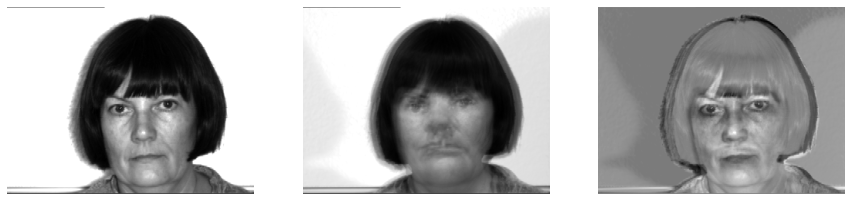

In [ ]:
stack_images((X, SVD['A'], SVD['E']), k=1, imgshape=imgshape)

In [ ]:
### PARAMS
mu = 0.0001
lmbda = 0.01
##########
    
RPCA['A'], RPCA['E'] = bmRPCA(X, mu, lmbda)

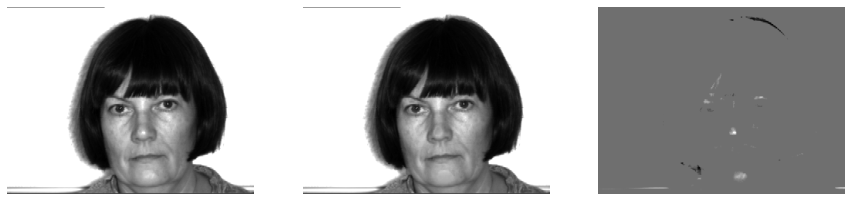

In [ ]:
stack_images((X, RPCA['A'], RPCA['E']), k=1, imgshape=imgshape)

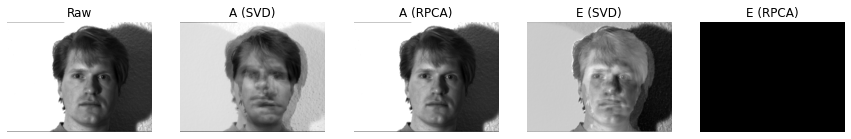

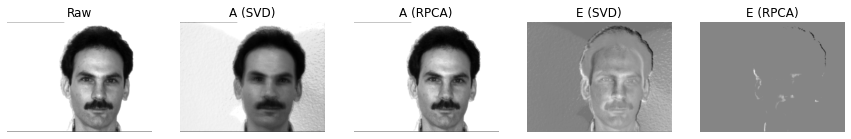

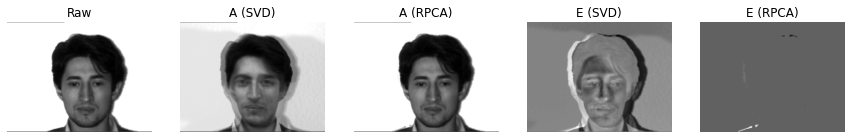

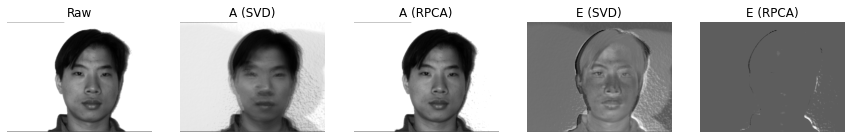

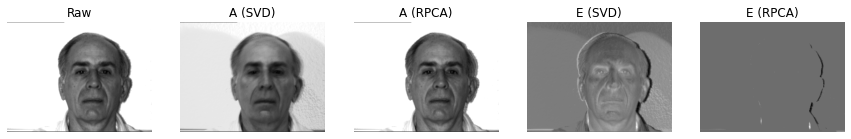

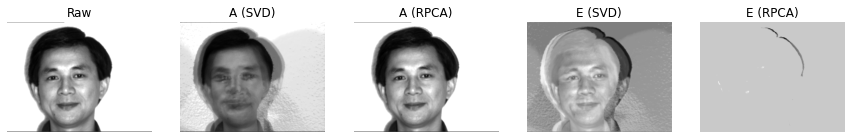

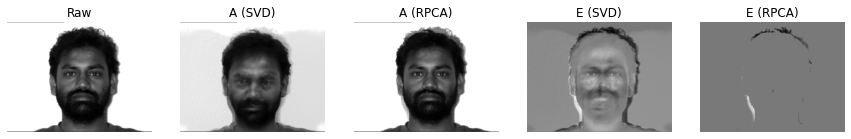

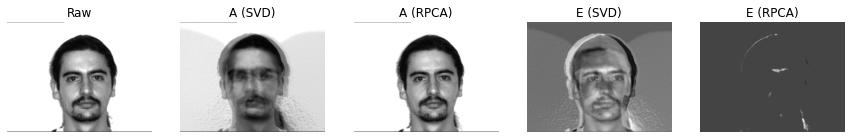

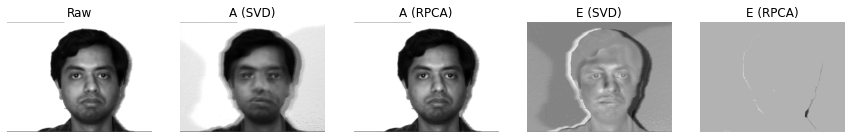

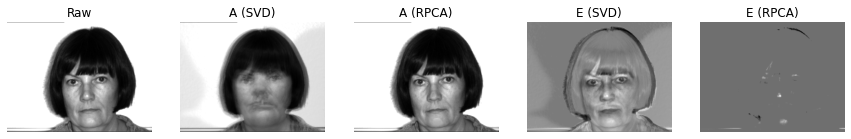

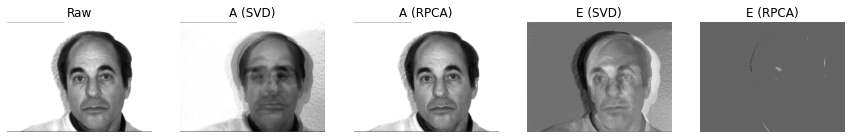

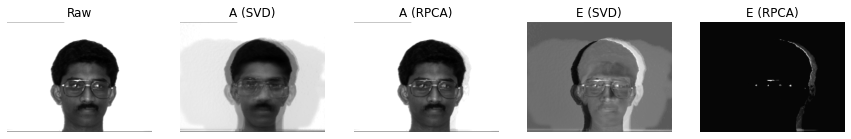

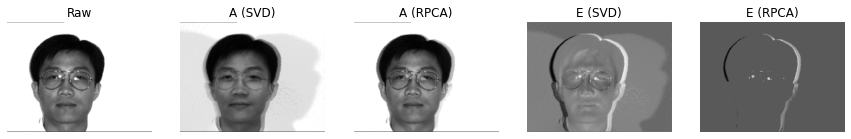

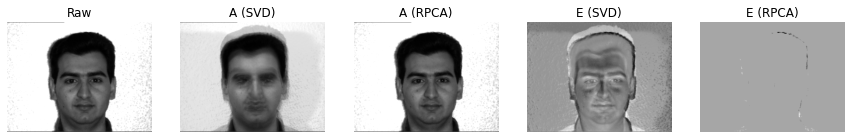

In [ ]:
yale_dataset_path = '/content/yalefaces/yalefaces'
imgshape = np.array([243,320])
person_ids = set([os.path.splitext(os.path.split(s)[1])[0][-2:]
                  for s in sorted(glob.glob(pjoin(yale_dataset_path, 'subject*')))])
person_ids = sorted(list(map(int, person_ids)))
captions = ['Raw', 'A (SVD)', 'A (RPCA)','E (SVD)', 'E (RPCA)']
for person_id in person_ids:
    X = get_data_matrix(yale_dataset_path, imgshape, person_id)
    SVD['A'], SVD['E'] = bmSVD(X, r)
    RPCA['A'], RPCA['E'] = bmRPCA(X, mu, lmbda)
    
    stack_images((X, SVD['A'], RPCA['A'], SVD['E'], RPCA['E']),
                 k=1, imgshape=imgshape, captions=captions)

In [ ]:
yale_dataset_path = '/content/yalefaces/yalefaces/centered'
imgshape = np.array([231, 195])
person_ids = np.arange(1,16)
captions = ['Raw', 'A (SVD)', 'A (RPCA)','E (SVD)', 'E (RPCA)']

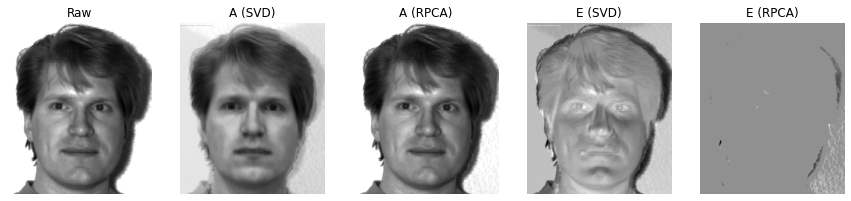

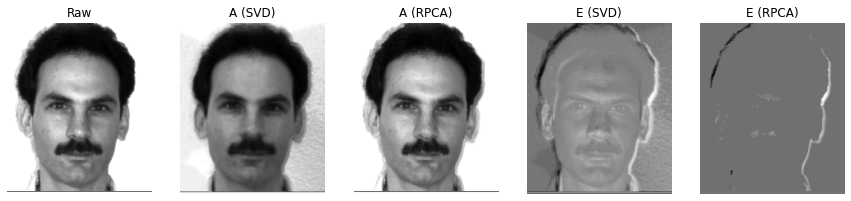

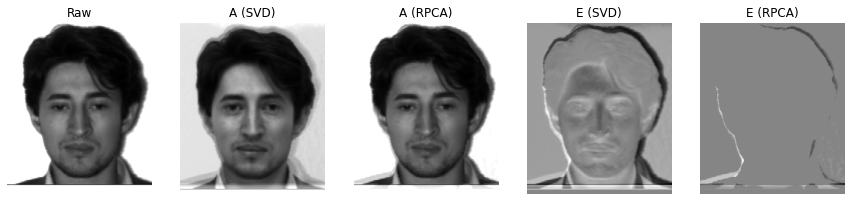

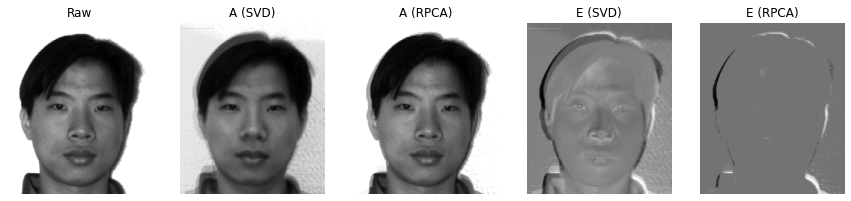

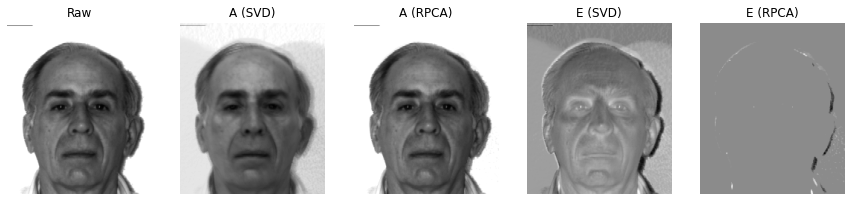

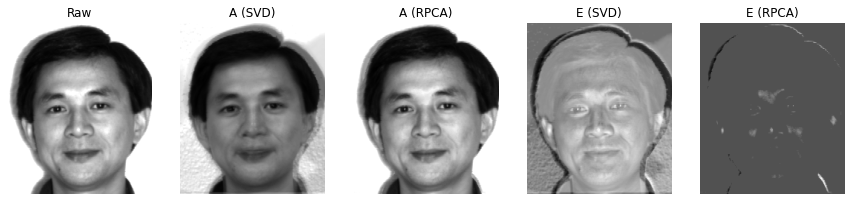

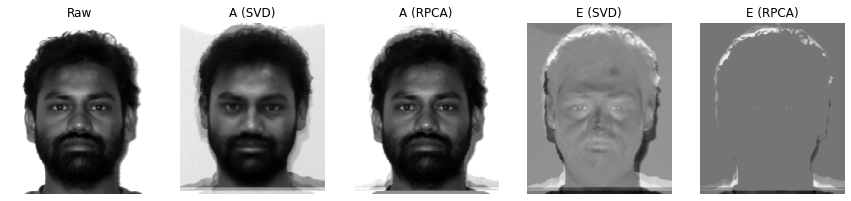

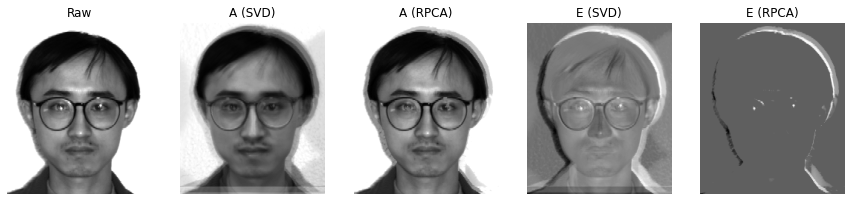

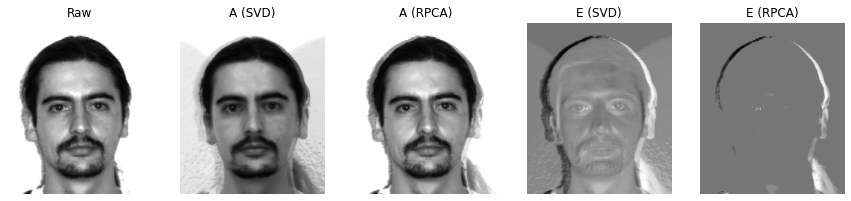

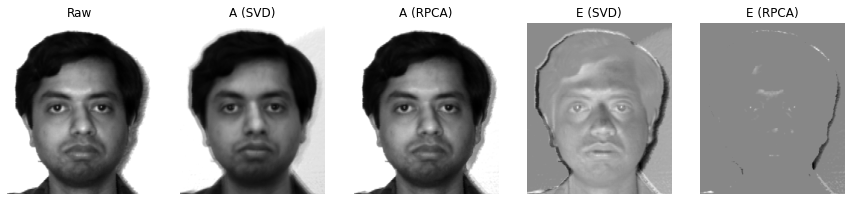

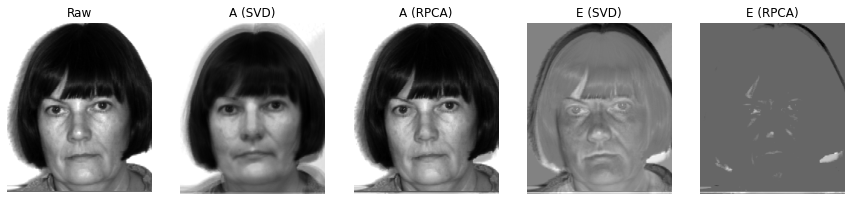

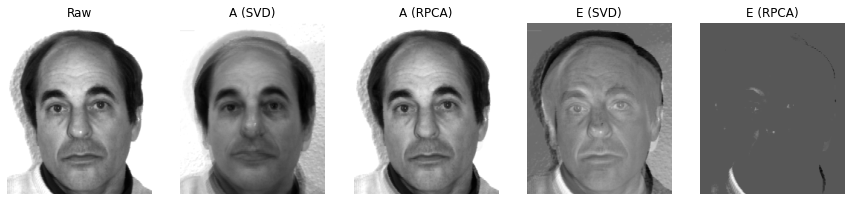

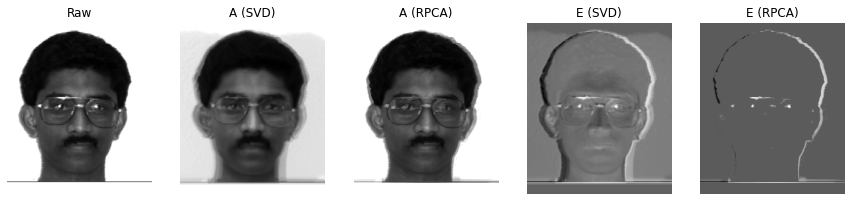

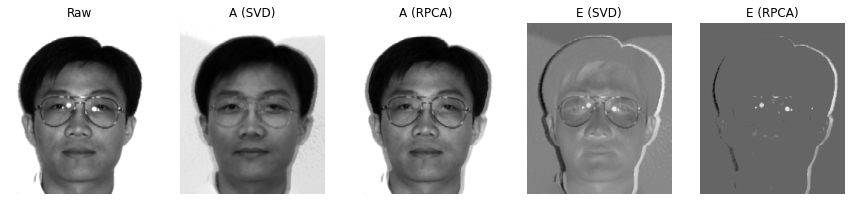

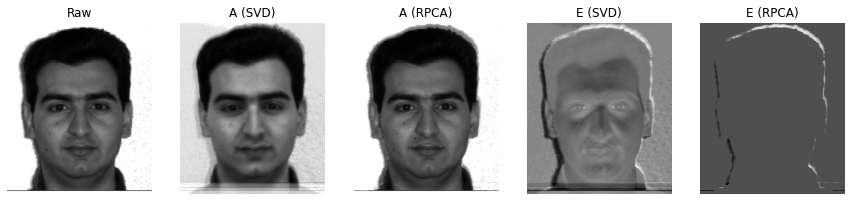

In [ ]:
for person_id in person_ids:
    X = get_data_matrix(yale_dataset_path, imgshape, person_id)
    SVD['A'], SVD['E'] = bmSVD(X, r)
    RPCA['A'], RPCA['E'] = bmRPCA(X, mu, lmbda)

    stack_images((X, SVD['A'], RPCA['A'],SVD['E'], RPCA['E']),
                 k=1, imgshape=imgshape, captions=captions)

###RPCA | implement rpca on lfw-people dataset

now let's implement on the lfw-people dataset:

In [ ]:
# Robust PCA
rpca_lfw = RobustPCA(tol = 0.00000001)
rpca_lfw.fit(X_train)

# extract decomposed matrices
L_lfw = rpca_lfw.get_low_rank()
S_lfw = rpca_lfw.get_sparse()

Not converged!
Total error: 1472.827258, allowed tolerance: 0.000000


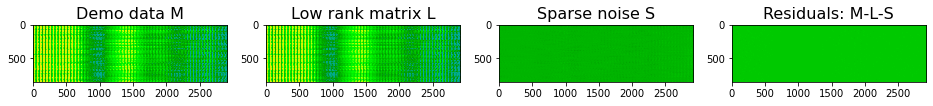

In [ ]:
# plot decomposition for demo data
plot_LS(X_train, L_lfw, S_lfw)

In [ ]:
# Adding Gaussian noise        
data_lfw_G = X_train + np.random.normal(size=(855,2914))

Not converged!
Total error: 1175.848804, allowed tolerance: 1000.000000


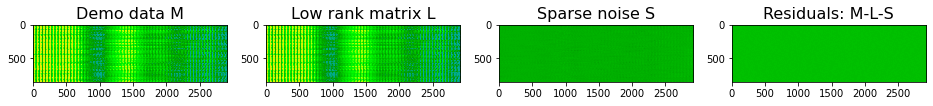

In [ ]:
# Robust PCA
rpca_lfw = RobustPCA(tol = 100)
rpca_lfw.fit(data_lfw_G)
# extract decomposed matrices
L_lfw = rpca_lfw.get_low_rank()
S_lfw = rpca_lfw.get_sparse()
# plot decomposition for demo data
plot_LS(data_lfw_G, L_lfw, S_lfw)

define some functions to vizualise the images and import some packages

In [ ]:
from pathlib import Path
from urllib.request import urlretrieve
import zipfile
import imageio
#from scipy.misc import imread
from scipy.ndimage.interpolation import zoom#
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def visualise_images(X, n_images, n_columns, randomise=True):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    indices = indices[:n_images]
    cmap = plt.cm.Greys_r
    n_rows = np.ceil(n_images / n_columns)
    fig = plt.figure(figsize=(2*n_columns, 2*n_rows))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # plot the digits: each image is 8x8 pixels
    for i, e in enumerate(indices):
        ax = fig.add_subplot(n_rows, n_columns, i + 1, xticks=[], yticks=[])
        ax.imshow(X[e], cmap=cmap, interpolation='nearest')

In [ ]:
def visualise_rpca(X, low_rank_part, sparse_part, n_images=10):
    """A little helper function to visualise the result of tensor RPCA
    """
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    indices = indices[:n_images]

    fig = plt.figure(figsize=(10, 2*n_images))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # plot the digits: each image is 8x8 pixels
    for i, e in enumerate(indices):
        cmap = plt.cm.Greys_r

        ax = fig.add_subplot(n_images, 4, 4*i + 1, xticks=[], yticks=[])
        ax.imshow(X[e], cmap=cmap, interpolation='nearest')
        if not i:
            ax.set_title('Original')

        ax = fig.add_subplot(n_images, 4, 4*i + 2, xticks=[], yticks=[])
        ax.imshow(low_rank_part[e], cmap=cmap, interpolation='nearest')
        if not i:
            ax.set_title('Low-rank')

        ax = fig.add_subplot(n_images, 4, 4*i + 3, xticks=[], yticks=[])
        ax.imshow(sparse_part[e], cmap=cmap, interpolation='nearest')
        if not i:
            ax.set_title('Sparse')

        ax = fig.add_subplot(n_images, 4, 4*i + 4, xticks=[], yticks=[])
        ax.imshow(low_rank_part[e]+sparse_part[e], cmap=cmap, interpolation='nearest')
        if not i:
            ax.set_title('Reconstruction')

I am going to use directly the images instead of the vectorized version and implement rpca on the dataset in different situations to check rpca power for being able to isolate the clean tensor from the noise :
- **Original dataset**
- **Add Gaussain noise**
- **Add salt&pepper noise**
- **Add Speckle noise** 





In [ ]:
# We directly use the images as our data tensor
X = lfw_dataset.images

X = X.astype(np.float64)
X -= X.mean()

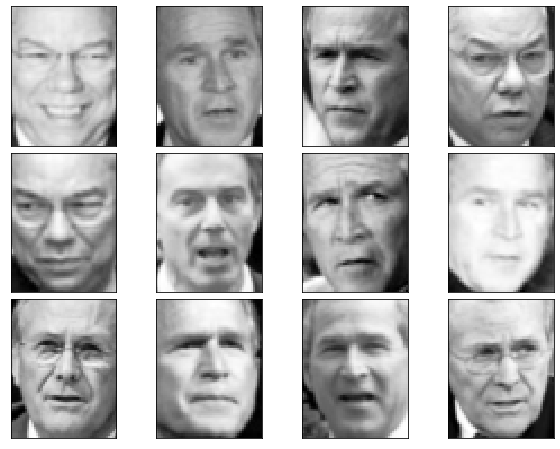

In [ ]:
visualise_images(X, 12, 4)

In [ ]:
!pip3 install tensorly

In [ ]:
import tensorly
import tensorly.decomposition

In [ ]:
X_noise = X + np.random.normal(size=(1140,62,47))

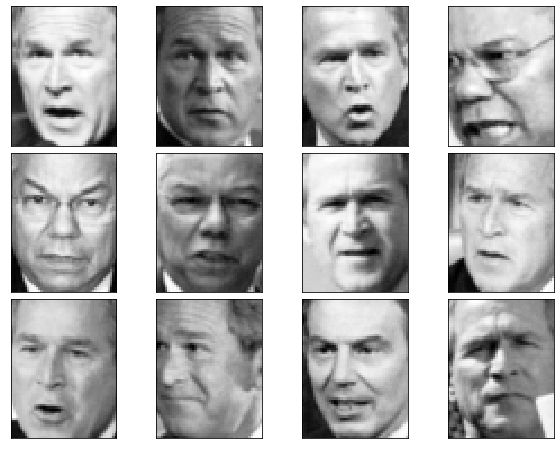

In [ ]:
visualise_images(X_noise, 12, 4)

In [ ]:
from tensorly.decomposition import robust_pca

In [ ]:
low_rank_part, sparse_part = robust_pca(X, reg_E=0.04, learning_rate=1.2, n_iter_max=20)

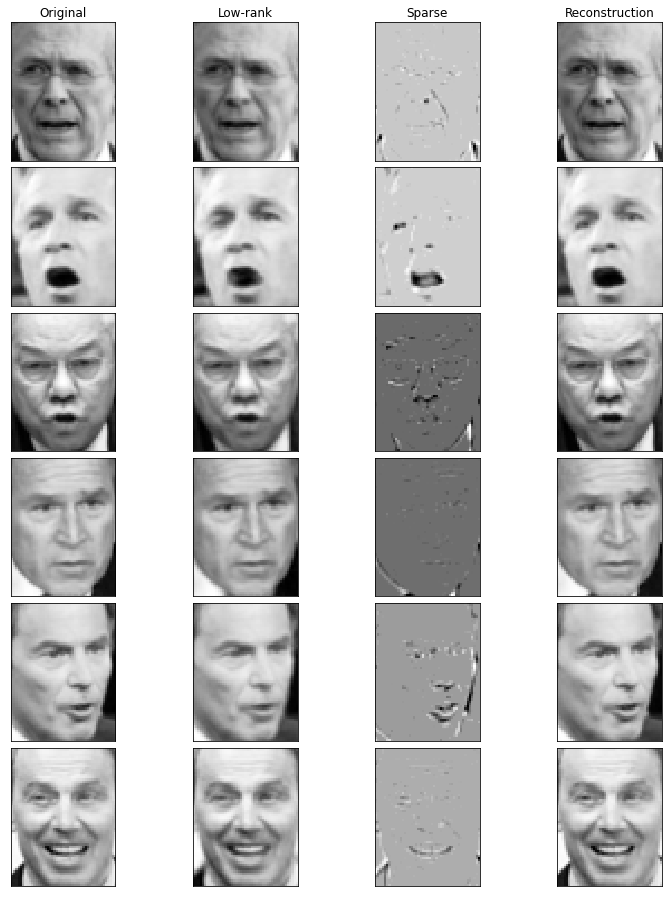

In [ ]:
visualise_rpca(X, low_rank_part, sparse_part, n_images=6)

In [ ]:
low_rank_part, sparse_part = robust_pca(X_noise, reg_E=0.04, learning_rate=1.2, n_iter_max=20)

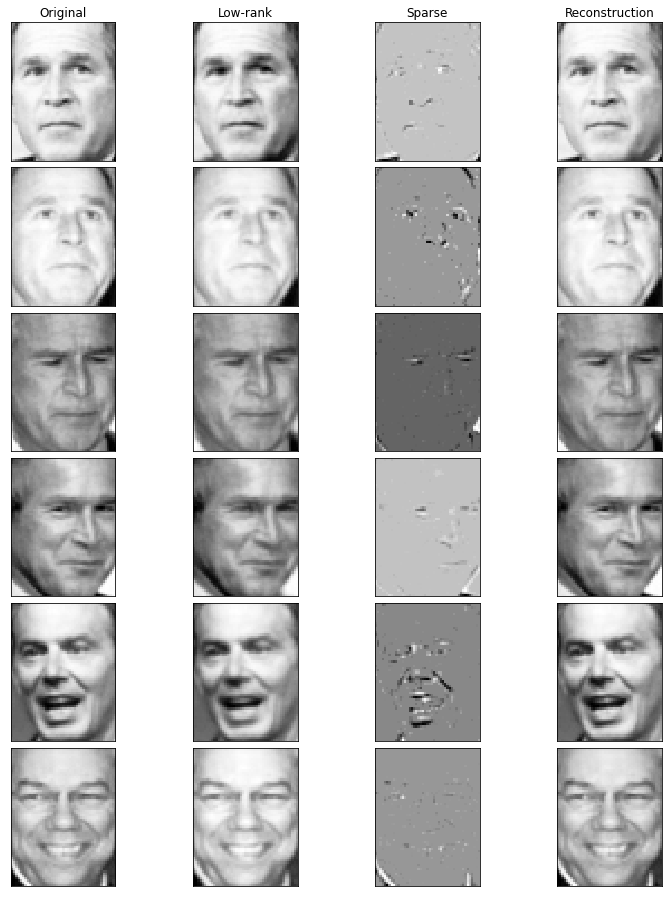

In [ ]:
visualise_rpca(X_noise, low_rank_part, sparse_part, n_images=6)

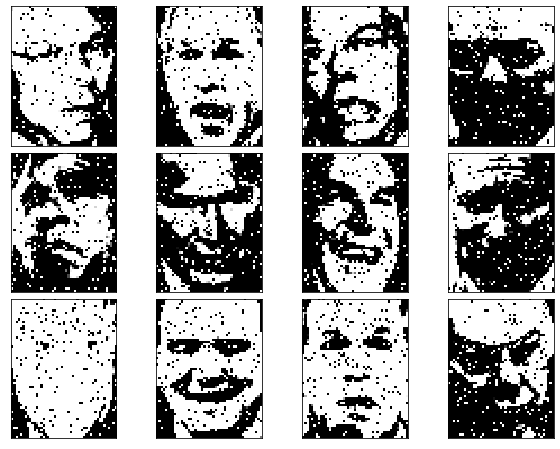

In [ ]:
import cv2
import numpy as np
from skimage.util import random_noise
# Add salt-and-pepper noise to the image
X_SaltPeper = random_noise(X, mode='s&p', amount=0.099)
visualise_images(X_SaltPeper, 12, 4)

In [ ]:
low_rank_part, sparse_part = robust_pca(X_SaltPeper, reg_E=0.04, learning_rate=1.2, n_iter_max=20)

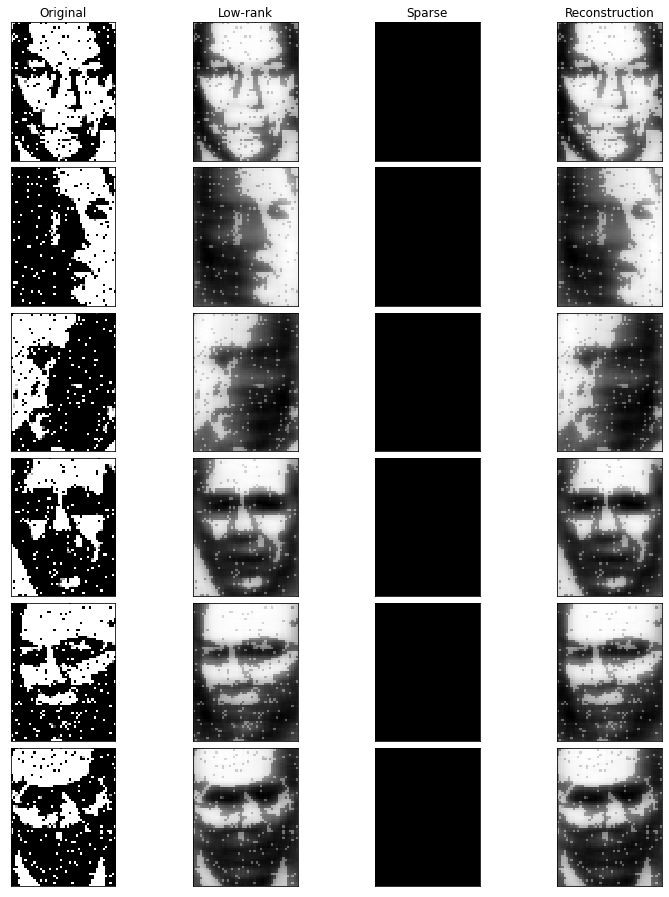

In [ ]:
visualise_rpca(X_SaltPeper, low_rank_part, sparse_part, n_images=6)

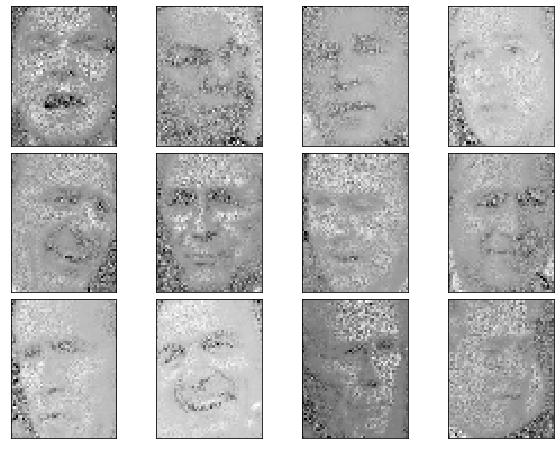

In [ ]:
gauss = np.random.normal(0,1,X.size)
gauss = gauss.reshape(X.shape[0],X.shape[1],X.shape[2])
X_Speckle = X + X * gauss

visualise_images(X_Speckle, 12, 4)


In [ ]:
low_rank_part, sparse_part = robust_pca(X_Speckle, reg_E=0.04, learning_rate=1.2, n_iter_max=20)

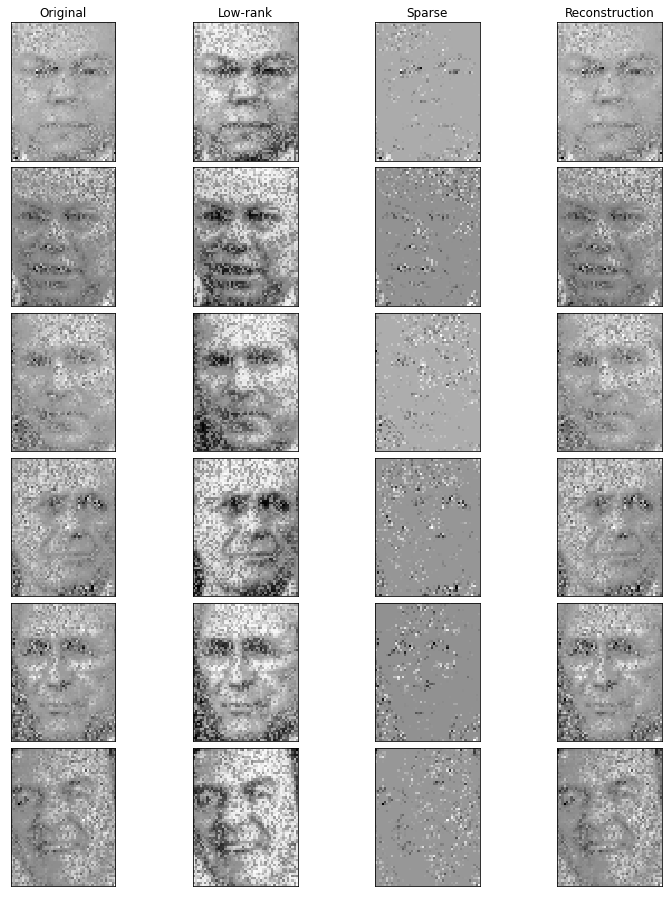

In [ ]:
visualise_rpca(X_Speckle, low_rank_part, sparse_part, n_images=6)

As you can see, the Robust PCA was able to isolate the clean tensor from the noise in almost all cases.

###Demo | Test random sample for different hyperparameters

In robust PCA, the residual tolerance is a hyperparameter to tune when there is dense noise $E$. 
specifies the convergence criterion for the RPCA algorithm on each window. By default,  TOLERANCE$=10^{-7}$.

In [ ]:
def setupData(paths, img_size, generate_labels=True):
    '''
    Input
    -------------
    paths : list of strings
        List of string paths regarding image files.
    img_shape : tuple of ints (n, m, 3)
        Tuple that represents the output shape for each image in the numpy matrix. The last
        dimension has to equal 3 as for the RGB channel.
    generate_labels : bool, optional, default: True
        Whether or not to return a 'labels' dict which translates 'y' int data into string labels.
        
    Output
    -------------
    X : numpy array, shape: (n, m, 3)
        X input data, a matrix with (n, m) dimensions and (3) 3-dimensional color channel.
        y : numpy array
        y input data, a single dimension array.
    '''
    n = len(paths)
    X_data = np.zeros(np.insert(img_size, 0, n), dtype='float32')
    y_data = np.zeros(n, dtype='int16')

    common_path = os.path.commonpath(paths)
    labels = dict([(i, label) for i, label in enumerate(os.listdir(common_path))])

    print(f'Data shape -> X: {X_data.shape}, y: {y_data.shape} \n---------------------\n')
    
    inverse_labels = {item[1]:item[0] for item in labels.items()} # Get inverse dict for string search

    for i in range(n):
        img = cv2.imread(paths[i], cv2.IMREAD_COLOR)[:, :, ::-1] # Read image file and invert BGR to RGB
        X_data[i, :, :, :] = cv2.resize(img, img_size[:2], interpolation=cv2.INTER_AREA) / 255

        label = os.path.relpath(paths[i], common_path).partition('/')[0] # Get label from relative path
        y_data[i] = inverse_labels[label]
        
    return (X_data, y_data, labels) if generate_labels else (X_data, y_data)

In [ ]:
os.listdir('/content/unzip_lfwpeople')

with tarfile.open('/content/unzip_lfwpeople/lfw-funneled.tgz') as tar:
    tar.extractall() 

In [ ]:
paths = [path for path in glob.glob('/content/lfw_funneled/**/*.jpg')][:2000]

shape = (125, 125, 3)

X_data, y_data, labels = setupData(paths, img_size=shape, generate_labels=True)

plt.imshow(X_data[0]), labels[y_data[0]]

In [ ]:
# read random data
image = imread('/content/lfw_funneled/Bo_Ryan/Bo_Ryan_0001.jpg')*1.0

In [ ]:
# robust PCA
rpca = RobustPCA(tol = 1, max_iter=1000)

L_image = image*0
S_image = image*0

for i in range(3):
    rpca.fit(image[:,:,i])
    L_image[:,:,i] = rpca.get_low_rank()
    S_image[:,:,i] = rpca.get_sparse()

Not converged!
Total error: 18.315541, allowed tolerance: 1.000000
Not converged!
Total error: 20.056661, allowed tolerance: 1.000000
Not converged!
Total error: 14.034379, allowed tolerance: 1.000000


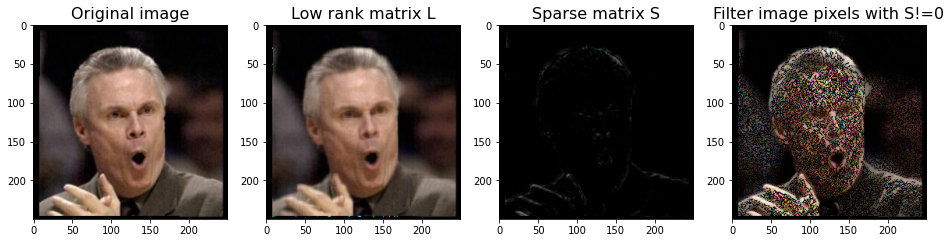

In [ ]:
image_LS(image, L_image, S_image, thres=0)

In [ ]:
# robust PCA
rpca = RobustPCA(tol = 100, max_iter=1000)

L_image = image*0
S_image = image*0

for i in range(3):
    rpca.fit(image[:,:,i])
    L_image[:,:,i] = rpca.get_low_rank()
    S_image[:,:,i] = rpca.get_sparse()

Converged!
Converged!
Converged!


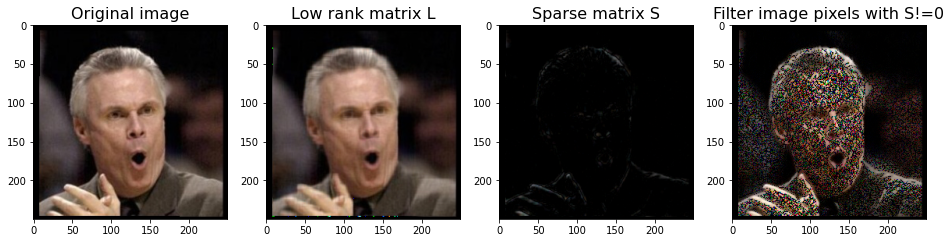

In [ ]:
image_LS(image, L_image, S_image, thres=0)

In [ ]:
# robust PCA with a max rank
rpca = RobustPCA(tol = 1, max_rank=10, max_iter=2000, use_fbpca=True)

L_image = image*0
S_image = image*0

for i in range(3):
    rpca.fit(image[:,:,i])
    L_image[:,:,i] = rpca.get_low_rank()
    S_image[:,:,i] = rpca.get_sparse()

Not converged!
Total error: 68972.201476, allowed tolerance: 1.000000
Not converged!
Total error: 63979.063086, allowed tolerance: 1.000000
Not converged!
Total error: 61056.929237, allowed tolerance: 1.000000


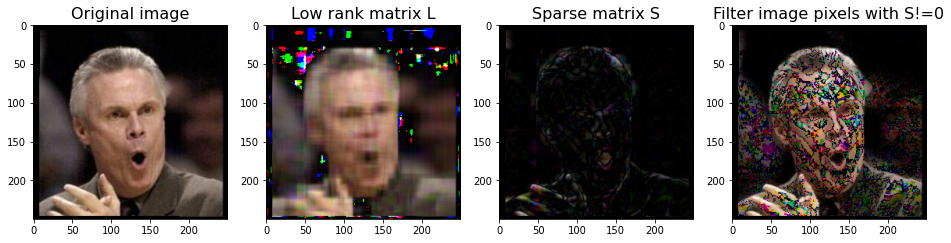

In [ ]:
image_LS(image, L_image, S_image, thres=0)

In [ ]:
# robust PCA
rpca = RobustPCA(tol = 0.000001, max_iter=1000)

L_image = image*0
S_image = image*0

for i in range(3):
    rpca.fit(image[:,:,i])
    L_image[:,:,i] = rpca.get_low_rank()
    S_image[:,:,i] = rpca.get_sparse()

Not converged!
Total error: 18.315541, allowed tolerance: 0.000001
Not converged!
Total error: 20.056661, allowed tolerance: 0.000001
Not converged!
Total error: 14.034379, allowed tolerance: 0.000001


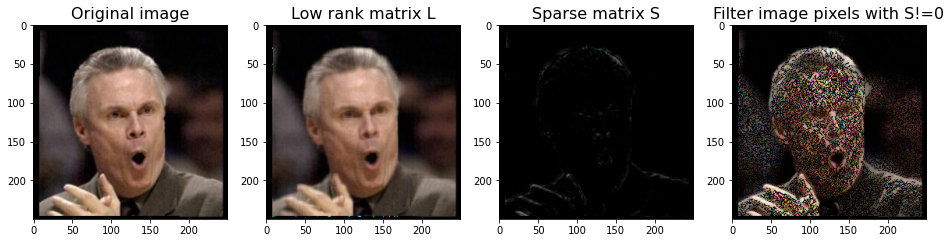

In [ ]:
image_LS(image, L_image, S_image, thres=0)

## Comparison | PCA vs RPCA

In [ ]:
k = 4
n_it = 1
timeSVD, timeRPCA = [], []
for person_id in person_ids:
    X = get_data_matrix(lfw-people, imgshape, person_id)
    tSVD = getMeanTime(bmSVD, (X, k), n_it)
    tRPCA = getMeanTime(bmRPCA, (X, mu, lmbda), n_it)
    
    timeSVD.append(tSVD)
    timeRPCA.append(tRPCA)
    

In [ ]:
print('Mean exectution time:\n\tSVD\t{:.4f}s\n\tRPCA\t{:.4f}s\n'\
      .format(np.mean(timeSVD), np.mean(tRPCA)))

Mean exectution time:
	SVD	0.0110s
	RPCA	0.5227s

